In [21]:
# #importer les ficher non accessibles localement

# from google.colab import files
# uploaded = files.upload()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import os
from os.path import normpath
from pathlib import PureWindowsPath
import numpy as np


# def convert(path):
#     return PureWindowsPath(normpath(PureWindowsPath(path).as_posix())).as_posix()


# chemin_du_fichier = convert("train_xl.jsonl")
df = pd.read_json("train_xl.jsonl" , lines=True)
print(df.head())

l_option1 = list(df["option1"])
l_option2 = list(df["option2"])




def frequency1(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]
    for i in range(len(sorted_words)):
        sorted_words[i][1] /= 2

    return sorted_words

def frequency2(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    sorted_words = [[word, freq] for word, freq in sorted_words]

    return sorted_words

def frequency3(l):
    counter = Counter(l)
    # Trie les mots par fréquence décroissante
    sorted_words = sorted(counter.items(), key=lambda x: x[1], reverse=True)

    sorted_words = [[word, freq] for word, freq in sorted_words]
    unsorted_words = {word:freq for word, freq in sorted_words}
    return sorted_words, unsorted_words

words_and_occurences_sorted_option1 = frequency1(l_option1)
#common_words_and_occurences_sorted_option1
words_and_occurences_sorted_option2 = frequency1(l_option2)

# def common_words_only(l_sorted_occurences):
#     for line in l_sorted_occurences:
#         if line

                                qID  \
0  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2   
1  3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1   
2  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1   
3  3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2   
4  3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2   

                                            sentence option1 option2  answer  
0  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       2  
1  Ian volunteered to eat Dennis's menudo after a...     Ian  Dennis       1  
2  He never comes to my home, but I always go to ...    home   house       1  
3  He never comes to my home, but I always go to ...    home   house       2  
4  Kyle doesn't wear leg warmers to bed, while Lo...    Kyle   Logan       2  


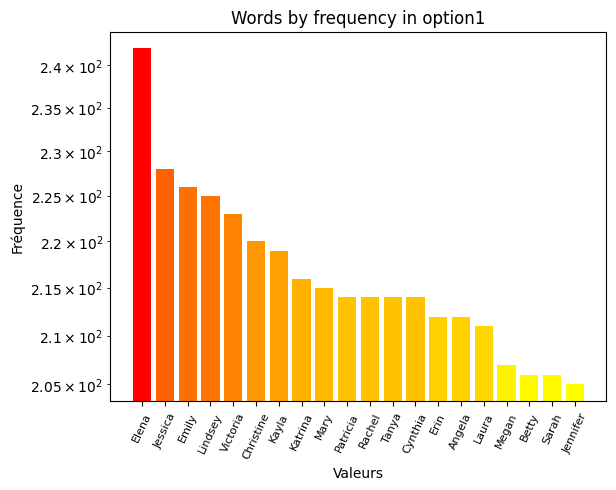

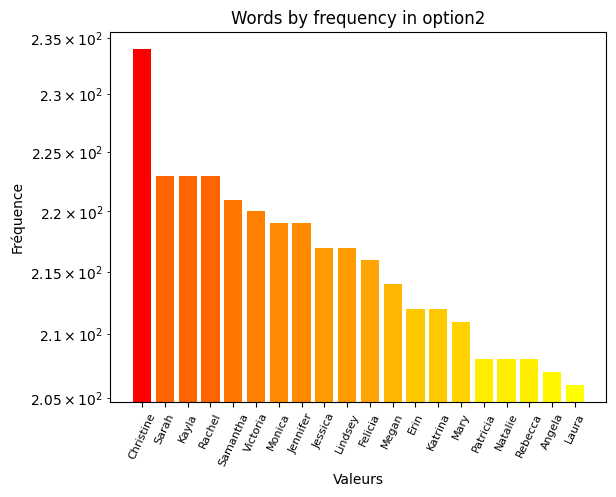

In [119]:
from matplotlib import colors

def frequency_plot(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')

    ax.set_yscale('log')
# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=65)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()

def frequency_COCAvsWINOGRANDE(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')
    x = np.arange(0, 26)
    plt.plot(x, x, color='green', linewidth=2, label="f(x) = x")

# Titres et labels
    plt.title(plot_name)
    plt.xlabel("COCA frequency rank")
    plt.ylabel("Winogrande frequency rank")
    plt.xticks(rotation=65)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.legend(loc='upper left')
    plt.show()

def frequency_plot_linear(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))

# Créer une figure et un axe
    fig, ax = plt.subplots(figsize=(12, 6))

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')

    ax.set_yscale('linear')
# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Words")
    plt.ylabel("Log likelihood difference")
    plt.xticks(rotation=65)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()

def frequency_plot_log_likelihood(x,y,plot_name):
# Créer un colormap allant du rouge au bleu
    cmap = colors.LinearSegmentedColormap.from_list("red_to_blue", ["yellow", "red"])

# Normaliser les fréquences entre 0 et 1 pour les appliquer au colormap
    norm = plt.Normalize(min(y), max(y))
    plt.figure(figsize=(10, 6))
# Créer une figure et un axe
    fig, ax = plt.subplots()

# Dessiner l'histogramme avec un dégradé de couleur
    for i in range(len(x)):
        ax.bar(x[i], y[i], width=0.8, color=cmap(norm(y[i])), align='center')

    ax.set_yscale('log')
# Titres et labels
    plt.title(plot_name)
    plt.xlabel("Words")
    plt.ylabel("Log-likelihood score")
    plt.xticks(rotation=65)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.show()

plot_name = "Words by frequency in option1"
x1 = [row[0] for row in words_and_occurences_sorted_option1]
y1 = [row[1] for row in words_and_occurences_sorted_option1]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by frequency in option2"
x2 = [row[0] for row in words_and_occurences_sorted_option2]
y2 = [row[1] for row in words_and_occurences_sorted_option2]
frequency_plot(x2[:20],y2[:20],plot_name)



C:\Users\DELL\AppData\Local\Temp\ipykernel_15520\924689527.py:6: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-lambda_ * x) + 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_15520\924689527.py:6: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(-lambda_ * x) + 1


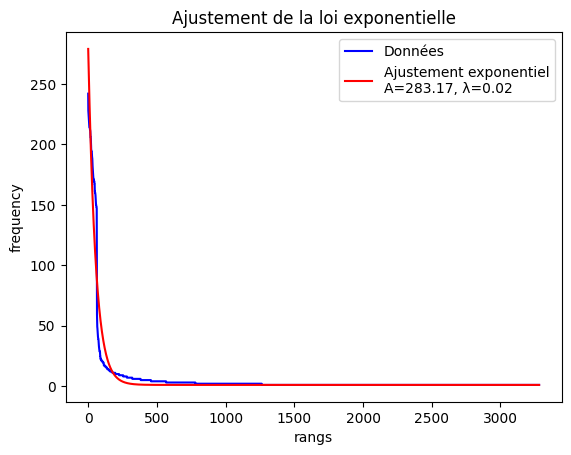

R² : 0.9381
Paramètre estimé A : 283.17
Paramètre estimé lambda : 0.02


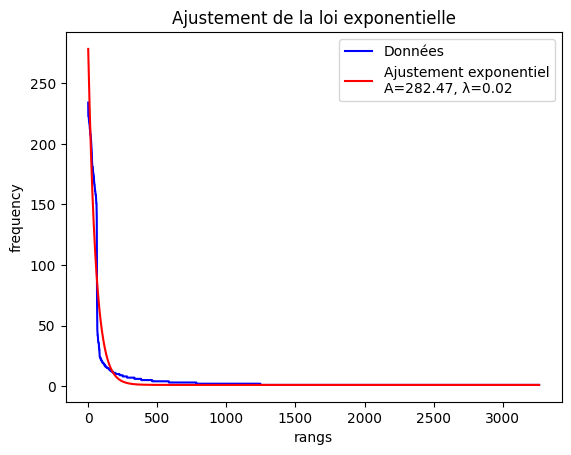

R² : 0.9356
Paramètre estimé A : 282.47
Paramètre estimé lambda : 0.02


In [24]:
from scipy.optimize import curve_fit


# Définir la fonction exponentielle pour l'ajustement
def exp_func(x, A, lambda_):
    return A * np.exp(-lambda_ * x) + 1

def exp_model_and_plot(x_values,y_values):
    # Ajuster la fonction exponentielle aux données
    rangs = np.arange(1, len(x_values) + 1)
    params, covariance = curve_fit(exp_func, rangs, y_values, p0=[1, 0.1])

# Extraire les paramètres ajustés A et lambda
    A_estime = 8
    A_estime, lambda_estime = params


# Générer les valeurs ajustées
    x_fit = np.linspace(min(rangs), max(rangs), len(x_values))
    y_fit = exp_func(x_fit, *params)

# Visualiser les données et l'ajustement
    plt.plot(rangs, y_values, label="Données", color="blue")
    plt.plot(x_fit, y_fit, label=f"Ajustement exponentiel\nA={A_estime:.2f}, λ={lambda_estime:.2f}", color="red")
    plt.xlabel('rangs')
    plt.ylabel('frequency')
    plt.legend()
    plt.title('Ajustement de la loi exponentielle')
    plt.show()

    residus = y_values - y_fit

# Somme totale des carrés (variance des valeurs réelles autour de leur moyenne)
    SS_tot = np.sum((y_values - np.mean(y_values))**2)

# Somme des carrés des résidus
    SS_res = np.sum(residus**2)

# Coefficient de détermination R²
    R_squared = 1 - (SS_res / SS_tot)

# Affichage du résultat
    print(f"R² : {R_squared:.4f}")
    print(f"Paramètre estimé A : {A_estime:.2f}")
    print(f"Paramètre estimé lambda : {lambda_estime:.2f}")

exp_model_and_plot(x1,y1)
exp_model_and_plot(x2,y2)

# Compare the word distribution of the dataframe with a classic distribution

In [25]:
from tqdm import tqdm
# Create a list of frequences for dt words
def frequency_list(df):
    tot_word_list = []
    for index, row in tqdm(df.iterrows(),total = len(df)):
        for word in row.values[1].split():
                if not (word == '_' or word[0].isupper()):
                    tot_word_list.append(word)
    return *frequency3(tot_word_list), len(tot_word_list)

frequency_list_df1, dict_frequency_list_df1, size_frequency_list_df1 = frequency_list(df)

100%|██████████| 40398/40398 [00:02<00:00, 17096.92it/s]


récupérer les 2 fréquences relatives : cacluler la diff normalisée par la fréquence du corpus de référécen
    on s'attend à une distribution en cloche
    
faire la méthode de vraissemblance que si la fréquence des mots (nb) est suffisament grande
plus le log est grand, plus
=> le seuil de fréquence minimal est de 5 => on ne calcule pas leurs valeurs

fonction de calcul de spécificité
TXM, i tramer, ...

In [26]:
# we import data from COCA :

# Charger le fichier Excel
df2 = pd.read_excel("wordFrequency.xlsx", sheet_name="4 forms (219k)")

# Sélectionner deux colonnes
frequency_list_df2 = df2[["word", "freq"]].values.tolist()
frequency_list_df2_rank = df2[["word", "rank"]].values.tolist()
size_frequency_list_df2 = 50033612/0.05

my_dict_coca = {key:value for key,value in frequency_list_df2 }
my_dict_coca2 = {key:value for key,value in frequency_list_df2_rank }



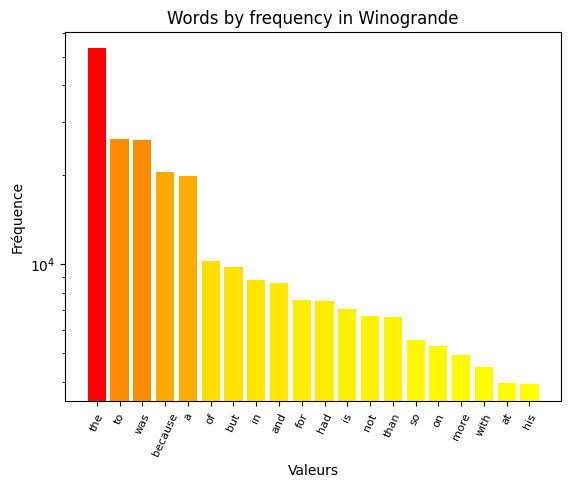

638387


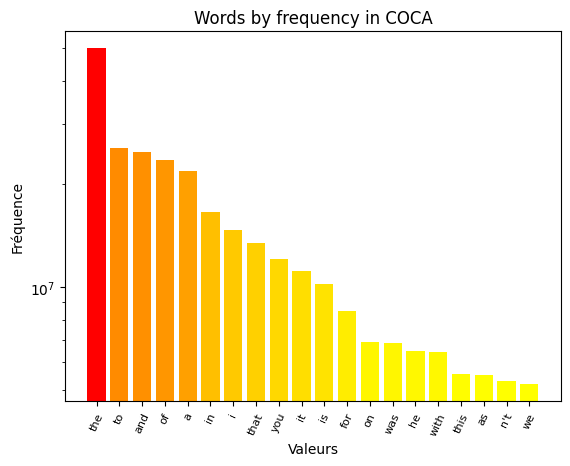

In [27]:
plot_name = "Words by frequency in Winogrande"
x1 = [row[0] for row in frequency_list_df1]
y1 = [row[1] for row in frequency_list_df1]
frequency_plot(x1[:20],y1[:20],plot_name)
print(size_frequency_list_df1)
plot_name = "Words by frequency in COCA"
x1 = [row[0] for row in frequency_list_df2]
y1 = [row[1] for row in frequency_list_df2]
frequency_plot(x1[:20],y1[:20],plot_name)

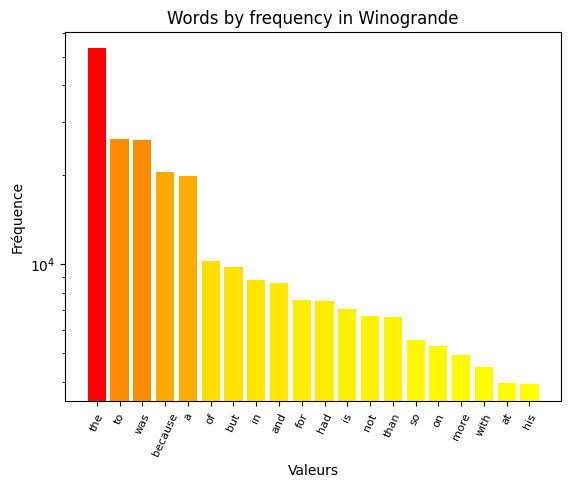

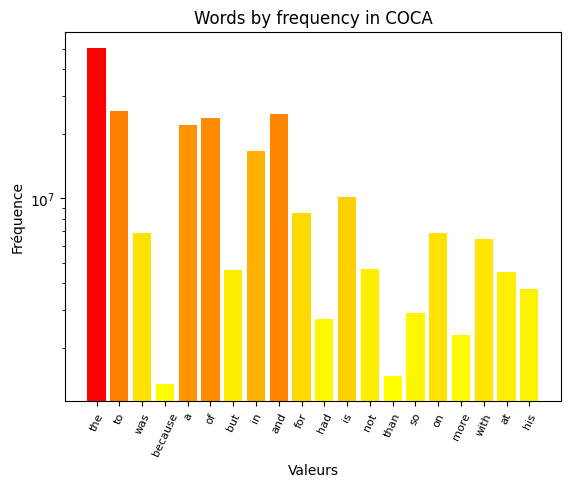

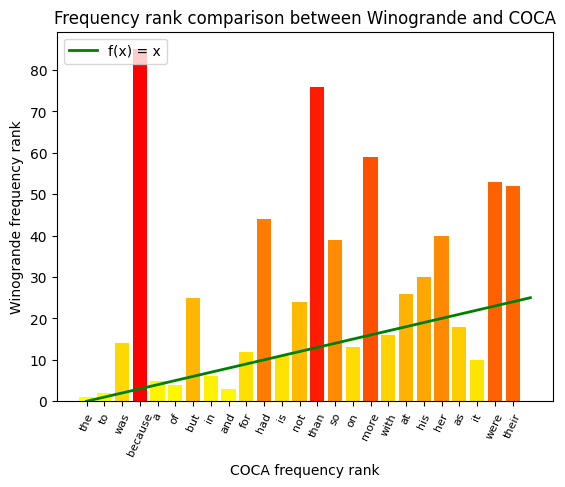

In [28]:
plot_name = "Words by frequency in Winogrande"
x1 = [row[0] for row in frequency_list_df1]
y1 = [row[1] for row in frequency_list_df1]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Words by frequency in COCA"
y1 = [my_dict_coca[key] if key in my_dict_coca else 0 for key in x1  ]
frequency_plot(x1[:20],y1[:20],plot_name)

plot_name = "Frequency rank comparison between Winogrande and COCA"
y1 = [my_dict_coca2[key] if key in my_dict_coca2 else 0 for key in x1  ]
frequency_COCAvsWINOGRANDE(x1[:25],y1[:25],plot_name)

In [91]:
# on fait la méthode du log vraissemblance :
import math

def log_likelihood(a,b,c,d):
    E1 = c*(a+b)/(c+d)
    E2 = d*(a+b)/(c+d)
    return 2*(a*math.log(a/E1) + b*math.log(b/E2))

# we calculate for each word :
def log_for_40_values(frequency_list_df1, my_dict_coca,size_frequency_list_df1,size_frequency_list_df2):
    list_likelihood = []
    list_likelihood_less = []
    i = 0
    while frequency_list_df1[i][1] >= 10:
        if frequency_list_df1[i][0] in  my_dict_coca:
            a,b,c,d = frequency_list_df1[i][1],my_dict_coca[frequency_list_df1[i][0]],size_frequency_list_df1,size_frequency_list_df2
            if a/c > b/d:
                list_likelihood.append((frequency_list_df1[i][0],log_likelihood(a,b,c,d)))
            else:
                list_likelihood_less.append((frequency_list_df1[i][0],log_likelihood(a,b,c,d)))

#             if frequency_list_df1[i][0] == 'i':
#                 print("_________")
#             print("frequency list df1 i :", frequency_list_df1[i][0], frequency_list_df1[i][1], my_dict_coca[frequency_list_df1[i][0]],size_frequency_list_df1,size_frequency_list_df2, list_likelihood[-1][-1], sep = '\t')

        i += 1
    return list_likelihood, list_likelihood_less

list_likelihood, list_likelihood_less = log_for_40_values(frequency_list_df1,my_dict_coca,size_frequency_list_df1, size_frequency_list_df2)

L = sorted(list_likelihood,key = lambda x: x[1], reverse = True)
L_less = sorted(list_likelihood_less,key = lambda x: x[1], reverse = True)


<Figure size 1000x600 with 0 Axes>

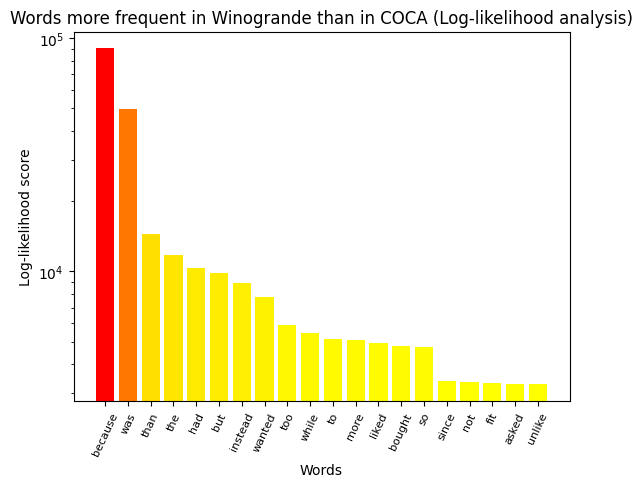

<Figure size 1000x600 with 0 Axes>

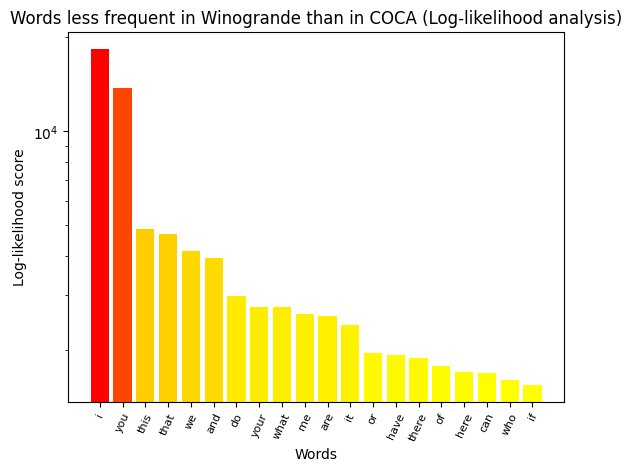

In [92]:
plot_name = "Words more frequent in Winogrande than in COCA (Log-likelihood analysis)"
x1 = [row[0] for row in L]
y1 = [row[1] for row in L]
frequency_plot_log_likelihood(x1[:20],y1[:20],plot_name)

plot_name = "Words less frequent in Winogrande than in COCA (Log-likelihood analysis)"
x1 = [row[0] for row in L_less]
y1 = [row[1] for row in L_less]
frequency_plot_log_likelihood(x1[:20],y1[:20],plot_name)

connecteurs discursifs
(lien entre les phrases)

appoline
arbres de parsing
fonctions syntaxiques

bcp de phrases ont à la fois but et because
=> analyser les connecteurs qui sont fréquement ensembles
éventuellemnt regarder les triplet et lier aux schémas (afficher les phrases)

bcp de schéma : pb de conteneur/contenant
classifieur qui détermine si un pb est de ce type (fitting problem)
90% de certitude
si on prive un modèle de ce type de pb, quel serait le succès
on fait notre problème fine tunning, modèle de sagaguchi

les prénons d'hommes et de femmes ne sont pas associés aux même schémas (s'entrainer = masculin, demander conseil = féminin)
quasi exclusivité

but = legitimer la négation

In [66]:
def cooccurrence(w1, w2):
    counter = 0
    for sentence in df["sentence"] :
        s = sentence.split()
        if w1 != w2 :
            if w1 in s and w2 in s :
                counter +=1
        else:
            if sentence.count(w1) >= 2:
                counter += 1
    return counter

def occurrence(w):
    counter = 0
    for sentence in df["sentence"] :
        s = sentence.split()
        if w in s :
            counter +=1
    return counter

n = 20
co_matrix = np.zeros((n, n), dtype=int)
nb_sentences = len(df["sentence"])

a = 0.1

for i in tqdm(range(20)):
    for j in range(20):
        co_matrix[i][j] = cooccurrence(L[i][0],L[j][0])
        # co_matrix[i][j] = (co_matrix[i][j] + a) / (nb_sentences +  a * len(frequency_list_df1))



n = 20
co_matrix_diag = np.zeros((n, n), dtype=int)

for i in range(20):
        co_matrix_diag[i][i] = occurrence(L[i][0])




co_matrix_diag = co_matrix_diag / nb_sentences
co_matrix = co_matrix / nb_sentences


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:41<00:00,  2.08s/it]


faire le PMI avec les 20 mots mais avec tous les autres mots qui ne sont pas nécessairement dans cette liste
faire avec les mots qui ont une fréquence minimale
prendre les valeurs extrêmes (2 et -2)

fin tunning sur le winogrande
voir comment le score évolue en fonction des données qu'on lui donne
faire des phrases :
- interchenger des mots qui ont une faible association
aurélien/appoline : représentaiton par des graphes

[[9.90148027e-04 2.62389227e-01 1.14782910e-01 3.47368682e-01
  9.28016238e-02 9.89157879e-02 4.30219318e-02 2.51992673e-02
  3.20807961e-02 2.03475420e-02 2.42883311e-01 7.12163969e-02
  1.34660132e-02 1.28224170e-02 1.69315313e-02 4.70320313e-04
  1.01168375e-01 1.33917521e-02 1.82434774e-02 1.26243873e-02]
 [2.62389227e-01 1.27085499e-01 8.22565474e-02 3.61676321e-01
  7.19590079e-02 1.34858161e-01 2.94321501e-02 2.75508689e-02
  5.24283380e-02 2.96549334e-02 2.57537502e-01 5.33937324e-02
  9.05985445e-03 1.06440913e-02 6.49537106e-02 2.72538244e-02
  8.68359820e-02 1.43571464e-02 1.51492648e-02 9.77771177e-03]
 [1.14782910e-01 8.22565474e-02 6.68349918e-04 1.06292391e-01
  3.36650329e-02 2.02980346e-03 1.98029605e-04 1.48522204e-03
  1.18817763e-03 7.92118422e-04 5.53987821e-02 7.37907817e-02
  6.01514926e-03 1.80702015e-03 1.62879350e-02 5.96564186e-03
  4.72795683e-03 2.47537007e-04 6.43596218e-04 0.00000000e+00]
 [3.47368682e-01 3.61676321e-01 1.06292391e-01 4.64899252e-01
  9.2

Text(0.5, 1.0, 'Cooccurrence table')

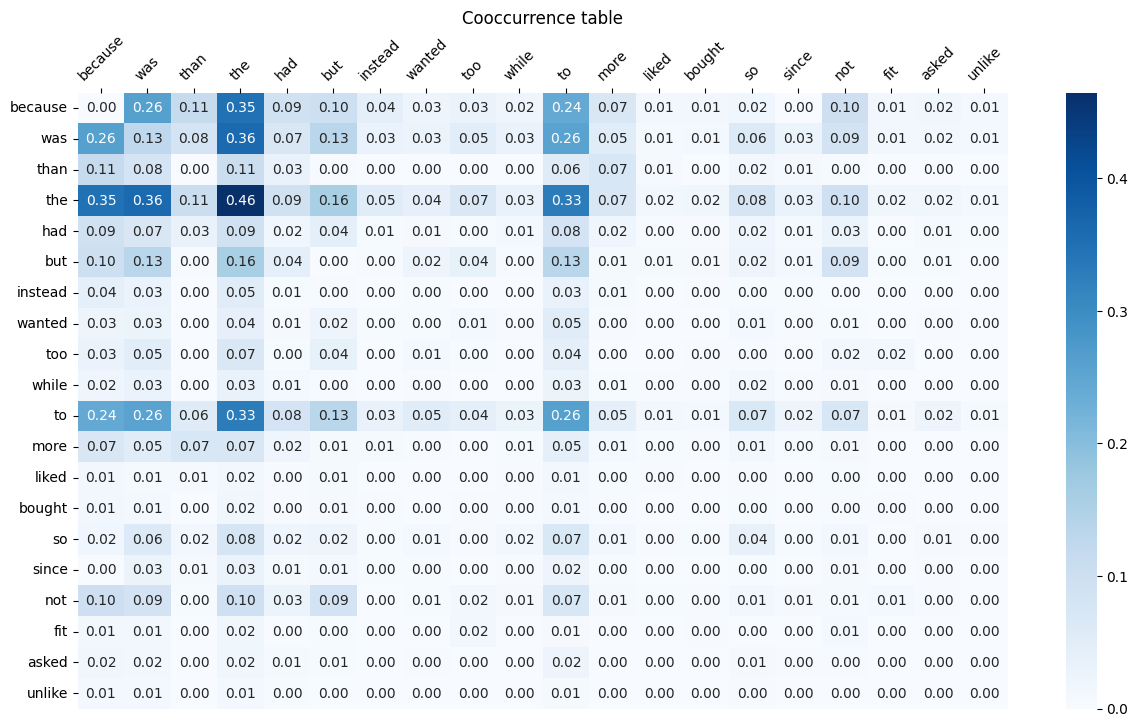

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(co_matrix)

labels = L[:20]
labels = [x[0] for x in labels]

plt.figure(figsize=(15, 8))
sns.heatmap(co_matrix, annot=True, fmt=".2f", cmap="Blues",xticklabels= labels, yticklabels= labels)
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
plt.title("Cooccurrence table")


# labels = L[:20]
# labels = [x[0] for x in labels]

# plt.figure(figsize=(15, 8))
# sns.heatmap(co_matrix_diag, annot=True, fmt="0.2f", cmap="Blues",xticklabels= labels, yticklabels= labels)
# plt.gca().xaxis.set_ticks_position('top')
# plt.xticks(rotation=45)
# plt.title("Frequency table")

# plt.show()


In [68]:
# Pointwise mutal information
import math
n = 20

PMI_matrix = np.zeros_like(co_matrix, dtype=float)


for i in range(20):
    for j in range(20):
        if co_matrix[i][j] == 0 or  co_matrix_diag[j][j] * co_matrix_diag[i][i] == 0:
            PMI_matrix[i][j] = float('-inf')
        else:
            PMI_matrix[i][j] = math.log(co_matrix[i][j]/(co_matrix_diag[j][j]*co_matrix_diag[i][i]))
# print(PMI_matrix)

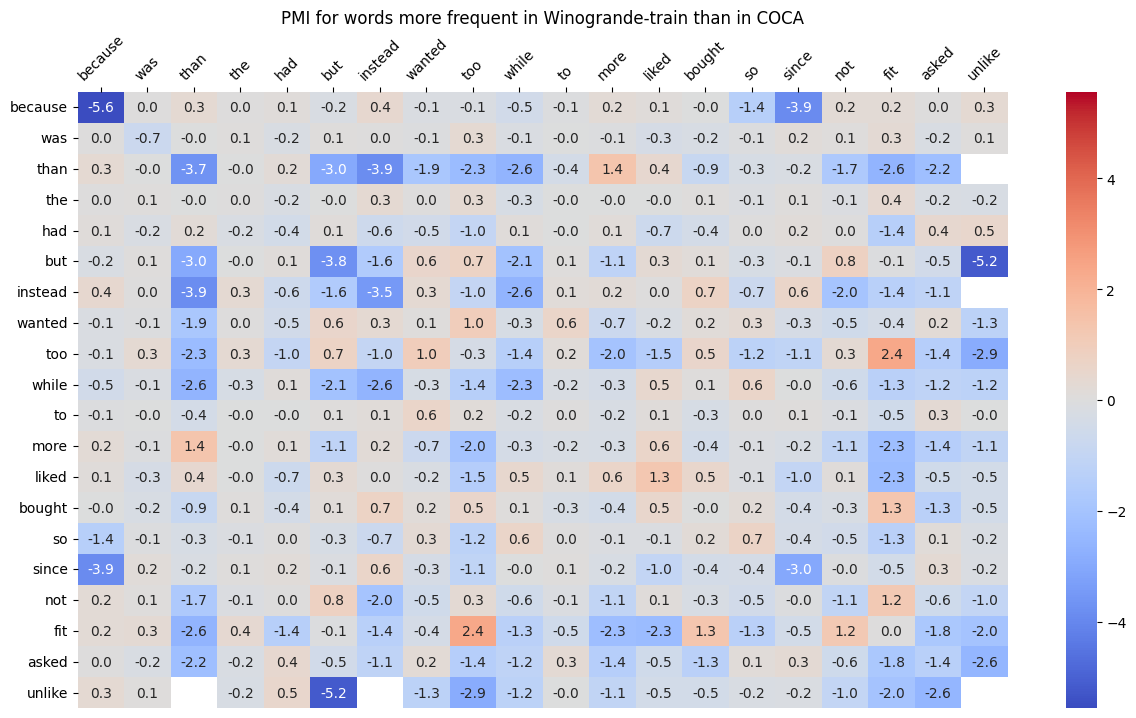

In [86]:
labels = L[:20]
labels = [x[0] for x in labels]
finite_mask = np.isfinite(PMI_matrix)
max_val = np.max(np.abs(PMI_matrix[finite_mask]))


plt.figure(figsize=(15, 8))
sns.heatmap(PMI_matrix, annot=True, fmt="0.1f",vmin=-max_val, vmax=max_val, cmap="coolwarm",xticklabels= labels, yticklabels= labels)
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
plt.title("PMI for words more frequent in Winogrande-train than in COCA")

plt.show()

schémas :
- comparaison

marc and peter were friends, but unlike marc, peter was really into sport, thus he often/never goes to matchs

In [70]:
male_names = [
    'Ian', 'Dennis', 'Kyle', 'Logan', 'Craig', 'Derrick', 'Robert', 'Donald', 'Leslie', 'William', 'Neil',
    'Kenneth', 'Eric', 'Kevin', 'Jason', 'Benjamin', 'Joseph', 'John', 'Aaron', 'Nick', 'Adam', 'Matthew',
    'Justin', 'Michael', 'Joel', 'Christopher', 'Steven', 'Brett', 'Jeffrey', 'Jim', 'Byron', 'Brian', 'Samuel',
    'Cricket', 'Jack', 'Lawrence', 'Randy', 'Ryan', 'Avid', 'Bill', 'Bob', 'Hunter', 'Jordan', 'Jay', 'Jeremy',
    'George', 'Ricky', 'Jake', 'David', 'Patrick', 'Joe', 'Don', 'Ken', 'Kenny', 'G', 'Mike', 'California',
    'Shane', 'Josh', 'Tim', 'Earl', 'Kim', 'Casper', 'Josh', 'Tim', 'Jay', 'Jeremy', 'Gavin', 'Samsung', 'Master',
    'Jay', 'Jeremy', 'David', 'Peter', 'Kendall', 'Jacob', 'Josh', 'Tim', 'Gordon', 'Daniel', 'Potato', 'Max',
    'Matt', 'Tim', 'Ken', 'Kevin', 'Joseph', 'Paul', 'George', 'Jeremy', 'Joseph', 'Brian', 'Nick', 'Nick', 'Ken',
    'Jake', 'Steve', 'Tom', 'Frank', 'Mike', 'Peter', 'Henry', 'Larry', 'John', 'James', 'Kyle', 'Tim', 'Michael',
    'Dave', 'Matt', 'Ben', 'Dustin', 'Oliver', 'Matt', 'Andy', 'Pete', 'Jake', 'Aaron', 'Brennan', 'Jason', 'James',
    'Thomas', 'Charles', 'Richard', 'Walter', 'Barry', 'Tom', 'Greg', 'Jerry', 'Mark', 'Johnny', 'Todd', 'Bobby',
    'Joe', 'Daniel', 'Sam', 'Chris', 'Josh', 'Will', 'Timothy', 'Samuel', 'Jack', 'Dustin', 'Johnny', 'Peter', 'Jerry',
    'Nelson'
]

female_names = [
    'Patricia', 'Megan', 'Jessica', 'Elena', 'Tanya', 'Amy', 'Jennifer', 'Sue', 'Natalie', 'Betty', 'Kayla', 'Emily',
    'Felicia', 'Sarah', 'Jane', 'Christine', 'Victoria', 'Samantha', 'Katrina', 'Mary', 'University', 'Laura',
    'Rachel', 'Monica', 'Maria', 'Joan', 'Carrie', 'Angela', 'Cynthia', 'Tea', 'Avid', 'Rebecca', 'Jill', 'Michelle',
    'Jen', 'Sunday', 'Brenda', 'Nancy', 'Tina', 'Pam', 'Margot', 'Donna', 'Paris', 'Glenda', 'Sheila', 'Callie',
    'Dina', 'Heather', 'Cathy', 'Susan', 'Fred', 'Thailand', 'China', 'Erins', 'Jenny', 'Kenny', 'Jenny', 'Lauren',
    'Erin', 'Sandy', 'Misty', 'Erica', 'Sandy', 'Valentine', 'Sherry', 'Beth', 'Carla', 'Daphne', 'Rebecca', 'Tina',
    'Helen', 'Margaret', 'Emily', 'Rachel', 'Laura', 'Joanna', 'Jill', 'Lucy', 'Nina', 'Kimberly', 'Kate', 'Sally',
    'Zoe', 'Maggie', 'Olivia', 'Stephanie', 'Selma', 'Ruby', 'Ginger', 'Rita', 'Penny', 'Olga', 'Katie', 'Maggie',
    'Claire', 'Paula', 'Fiona', 'Marie', 'Monica', 'Hannah', 'Gabrielle', 'Jessica', 'Rita', 'Gina', 'Helen', 'Anna',
    'Elizabeth', 'Sophia', 'Isabel', 'Charlotte', 'Olivia', 'Emily', 'Pippa', 'Jessica', 'Naomi', 'Kristen', 'Melanie',
    'Amanda', 'Ruth', 'Leah', 'Tiffany', 'Mia', 'Eva', 'Dina', 'Christina', 'Mira', 'Maggie', 'Rachel', 'Lauren',
    'Lena', 'Sarah', 'Tasha', 'Amelia', 'Sophia', 'Rachel', 'Katie', 'Hannah', 'Juliette', 'Sandra', 'Melanie',
    'Rosie', 'Helen', 'Emma', 'Julia', 'Emma', 'Anna', 'Barbara', 'Mandy', 'Claudia', 'Jasmine', 'Sasha', 'Julia',
    'Zoe', 'Faith', 'Adriana', 'Sophie', 'Alice', 'Vera', 'Emily', 'Betty', 'Nicole', 'Ava', 'Diana', 'Maria', 'Charlotte',
    'Lindsey'
]


In [71]:
def cooccurrence_gender(frequency_list_df1,female_names,male_names):
    co_matrix = np.zeros((2, 20), dtype=int)

    counter_female, counter_male = (0,0)
    for sentence in tqdm(df["sentence"]) :
        s = sentence.split()

        if any(mot in female_names for mot in s):
            counter_female +=1
            for i in range(20):
                if frequency_list_df1[i][0] in s:
                    co_matrix[0][i] = co_matrix[0][i] + 1

        if any(mot in male_names for mot in s):
            counter_male +=1
            for i in range(20):
                if frequency_list_df1[i][0] in s:
                    co_matrix[1][i] = co_matrix[1][i] + 1
    return counter_female, counter_male, co_matrix

a,b, co_matrix_gender = cooccurrence_gender(frequency_list_df1,female_names,male_names)
a /= len(df["sentence"])
b /= len(df["sentence"])

  0%|          | 0/40398 [00:00<?, ?it/s]

100%|██████████| 40398/40398 [00:04<00:00, 10079.27it/s]


In [72]:
co_matrix_gender = co_matrix_gender / len(df["sentence"])

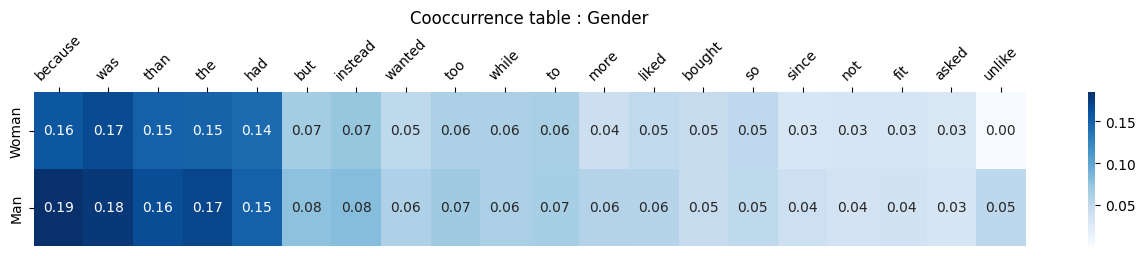

In [73]:
labels = L[:20]
labels = [x[0] for x in labels]

plt.figure(figsize=(16, 2))
sns.heatmap(co_matrix_gender, annot=True, fmt="0.2f", cmap="Blues",xticklabels= labels, yticklabels= ["Woman","Man"])
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
plt.title("Cooccurrence table : Gender")

plt.show()

In [39]:
n = 20

PMI_matrix_gender = np.zeros_like(co_matrix_gender, dtype=float)

for j in range(20):
    PMI_matrix_gender[0][j] = math.log(co_matrix_gender[0][j]/(a*co_matrix_diag[j][j]))
for j in range(20):
    PMI_matrix_gender[1][j] = math.log(co_matrix_gender[1][j]/(b*co_matrix_diag[j][j]))

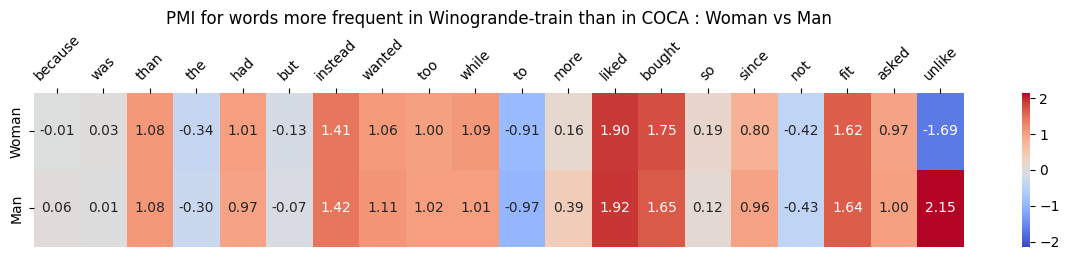

In [85]:
labels = L[:20]
labels = [x[0] for x in labels]

max_val = np.max(np.abs(PMI_matrix_gender))

plt.figure(figsize=(15, 2))
sns.heatmap(PMI_matrix_gender, annot=True, fmt="0.2f",vmin=-max_val, vmax=max_val, cmap="coolwarm",xticklabels= labels, yticklabels= ["Woman","Man"])
plt.gca().xaxis.set_ticks_position('top')
plt.xticks(rotation=45)
plt.title("PMI for words more frequent in Winogrande-train than in COCA : Woman vs Man")

plt.show()

In [75]:
df_female = pd.DataFrame(columns=['Sentence'])
for i in  tqdm(range(len(df))):
    s = df.iloc[i,1].split()
    if any(mot in female_names for mot in s):
        df_female.loc[len(df_female)] = [df.iloc[i,1]]

df_male = pd.DataFrame(columns=['Sentence'])
for i in  tqdm(range(len(df))):
    s = df.iloc[i,1].split()
    if any(mot in male_names for mot in s):
        df_male.loc[len(df_male)] = [df.iloc[i,1]]

  0%|          | 0/40398 [00:00<?, ?it/s]

100%|██████████| 40398/40398 [00:29<00:00, 1357.44it/s]


In [43]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 100000)
pd.set_option('display.max_colwidth', None)

print(df_male.head(50))

                                                                                                                      Sentence
0                      Ian volunteered to eat Dennis's menudo after already having a bowl because _ despised eating intestine.
1                       Ian volunteered to eat Dennis's menudo after already having a bowl because _ enjoyed eating intestine.
..                                                                                                                         ...
48       Ben played soccer and bowling every week. However, it was easy for him to play in the _ game because he hurt his arm.
49  Ben played soccer and bowling every week. However, it was difficult for him to play in the _ game because he hurt his arm.

[50 rows x 1 columns]


In [44]:
def frequency_list_gender(df):
    tot_word_list = []
    for i in tqdm(range(len(df))):
        for word in df.iloc[i,0].split():
                if not (word == '_' or word[0].isupper()):
                    tot_word_list.append(word)
    return *frequency3(tot_word_list), len(tot_word_list)

In [45]:
frequency_list_df_female, dict_frequency_list_df_female, size_frequency_list_df_female = frequency_list_gender(df_female)
frequency_list_df_male, dict_frequency_list_df_male, size_frequency_list_df_male = frequency_list_gender(df_male)

list_likelihood_female = log_for_40_values(frequency_list_df_female,my_dict_coca,size_frequency_list_df_female, size_frequency_list_df2)
list_likelihood_male = log_for_40_values(frequency_list_df_male,my_dict_coca,size_frequency_list_df_male, size_frequency_list_df2)

L_female = sorted(list_likelihood_female,key = lambda x: x[1], reverse = True)
L_male = sorted(list_likelihood_male,key = lambda x: x[1], reverse = True)

100%|██████████| 13846/13846 [00:00<00:00, 23400.62it/s]


<Figure size 1000x600 with 0 Axes>

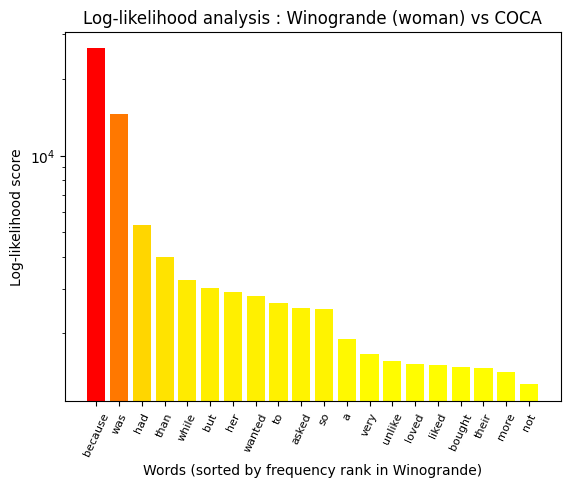

<Figure size 1000x600 with 0 Axes>

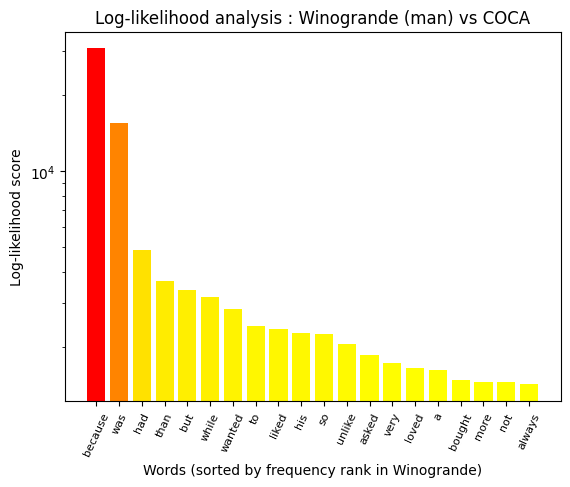

In [46]:
plot_name = "Log-likelihood analysis : Winogrande (woman) vs COCA"
x1 = [row[0] for row in L_female]
y1 = [row[1] for row in L_female]
frequency_plot_log_likelihood(x1[:20],y1[:20],plot_name)

plot_name = "Log-likelihood analysis : Winogrande (man) vs COCA"
x1 = [row[0] for row in L_male]
y1 = [row[1] for row in L_male]
frequency_plot_log_likelihood(x1[:20],y1[:20],plot_name)

In [111]:

L_female

[('because', 26402.535398583943),
 ('was', 14613.18441185513),
 ('had', 5353.430428521165),
 ('than', 4010.6370717633463),
 ('while', 3234.073116049236),
 ('but', 3019.41608369198),
 ('her', 2899.7937095929833),
 ('wanted', 2812.681998517294),
 ('to', 2639.2711905968526),
 ('asked', 2511.943350208804),
 ('so', 2486.3233149050807),
 ('a', 1899.4079588824961),
 ('very', 1663.3508819494764),
 ('unlike', 1563.1434718249507),
 ('loved', 1520.2670595691254),
 ('liked', 1500.5369288660715),
 ('bought', 1480.4394328876754),
 ('their', 1462.103704716113),
 ('more', 1407.7916980293433),
 ('not', 1259.3116900491787),
 ('always', 1226.44884250973),
 ('lot', 1064.966318087363),
 ('hated', 1039.0033403416671),
 ('likes', 972.959232046446),
 ('preferred', 960.0650120916716),
 ('gave', 949.1894009399937),
 ('needed', 902.9056684196945),
 ('since', 855.1642927971902),
 ('hair', 779.8265493159205),
 ('for', 679.5742622010589),
 ('better', 661.7904774360164),
 ('did', 652.5785361903299),
 ('instead', 619

In [115]:
L_female_n = L_female
L_male_n = L_male


# for i in range(len(L_female)):
#     temp = list(L_female[i])     # tuple -> liste
#     temp[1] /= size_frequency_list_df2 + size_frequency_list_df_female
#     L_female_n.append(temp)    # remettre en tuple

# for i in range(len(L_male)):
#     temp = list(L_male[i])     # tuple -> liste
#     temp[1] /= size_frequency_list_df2 + size_frequency_list_df_male
#     L_male_n.append(temp)    # remettre en tuple

L_more_female_n = []
L_more_male_n = []

for el in L_female_n:
    if any(el[0] in L_temp for L_temp in L_male_n):
        valeur_trouvee = next(v[1] for v in L_male_n if v[0] == el[0])

        if el[1] > valeur_trouvee:
            L_more_female_n.append((el[0], el[1] - valeur_trouvee))
        else:
            L_more_male_n.append((el[0], valeur_trouvee - el[1]))

L_more_female_n_sorted = sorted(L_more_female_n, key=lambda x: x[1], reverse = True)
L_more_male_n_sorted = sorted(L_more_male_n, key=lambda x: x[1], reverse=True)

In [113]:
L_more_female_n

[('had', 483.73672025766245),
 ('than', 349.6758349168408),
 ('while', 66.44207791965027),
 ('to', 199.99938755363655),
 ('asked', 647.1740802968968),
 ('so', 232.44870293377426),
 ('a', 271.0915676640234),
 ('their', 177.46297630188724),
 ('lot', 129.73818836602334),
 ('likes', 366.06412928762245),
 ('gave', 378.0610050515145),
 ('needed', 18.293890206810715),
 ('since', 53.66991126266464),
 ('hair', 528.7496296699088),
 ('for', 158.2612769523039),
 ('enjoyed', 109.39647918240894),
 ('due', 140.42947522573087),
 ('tried', 86.91737167354853),
 ('offered', 104.90126027886026),
 ('help', 116.63232354536149),
 ('made', 91.31424750342666),
 ('felt', 95.5561349666338),
 ('wore', 55.83559552664991),
 ('helped', 64.39591919967177),
 ('buy', 45.336051508455),
 ('knew', 3.729145489212783),
 ('cat', 106.27187188678738),
 ('asks', 1.5151251658278966),
 ('stayed', 25.007562257288413),
 ('much', 48.21727921282002),
 ('owned', 156.7317609097405),
 ('advice', 166.94908760335042),
 ('healthy', 8.11869

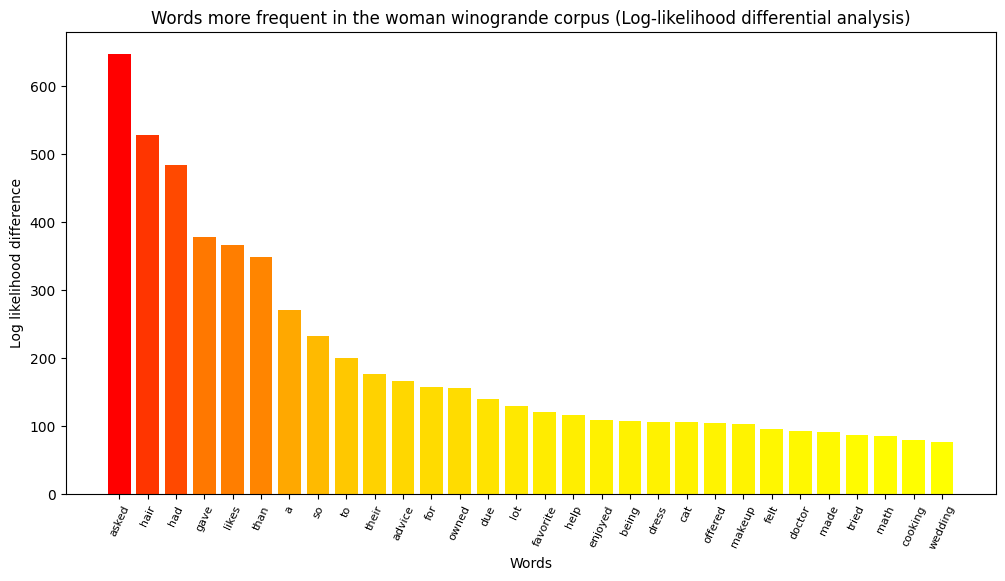

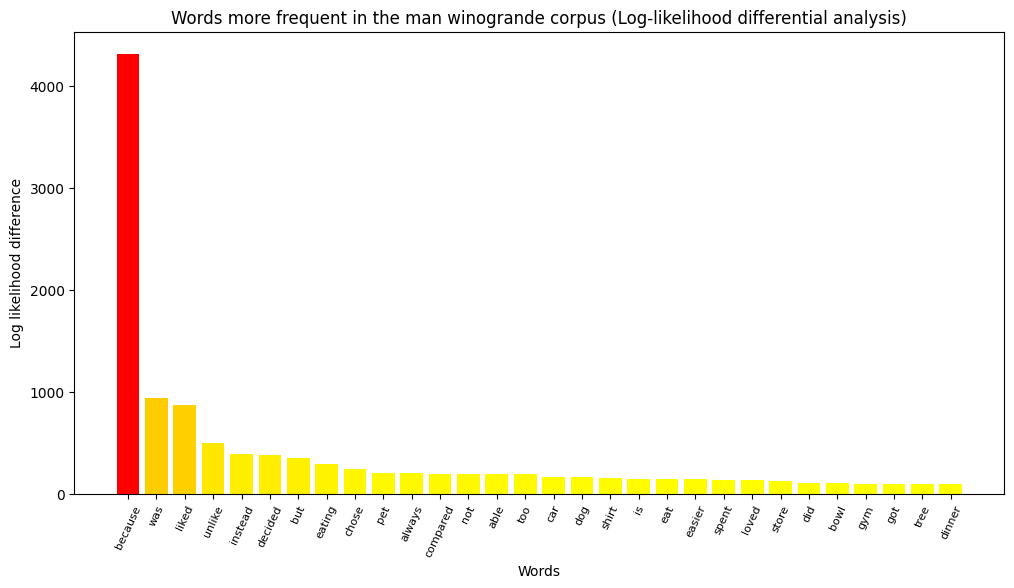

In [120]:
plot_name = "Words more frequent in the woman winogrande corpus (Log-likelihood differential analysis)"
x1 = [row[0] for row in L_more_female_n_sorted]
y1 = [row[1] for row in L_more_female_n_sorted]
frequency_plot_linear(x1[:30],y1[:30],plot_name)

plot_name = "Words more frequent in the man winogrande corpus (Log-likelihood differential analysis)"
x1 = [row[0] for row in L_more_male_n_sorted]
y1 = [row[1] for row in L_more_male_n_sorted]
frequency_plot_linear(x1[:30],y1[:30],plot_name)